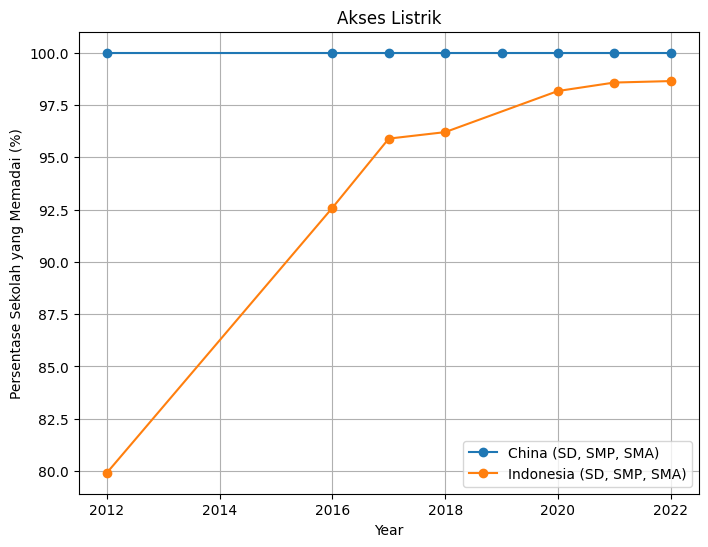

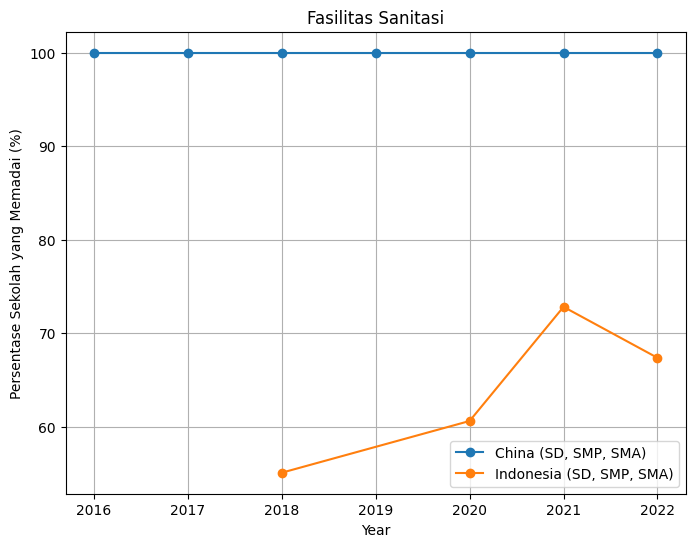

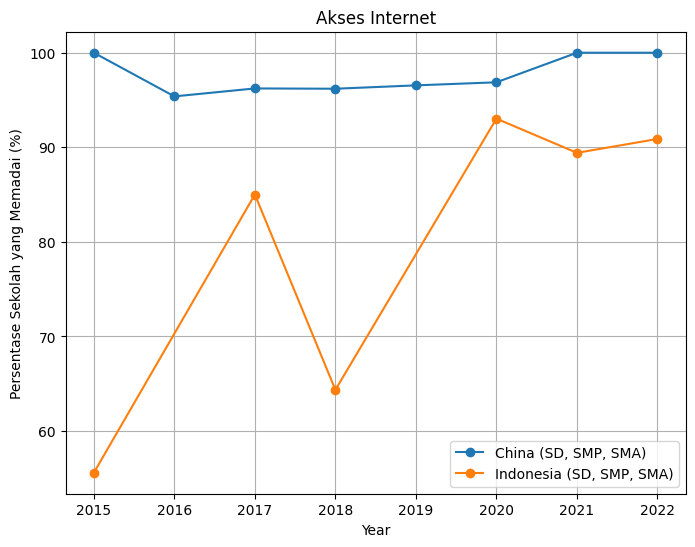

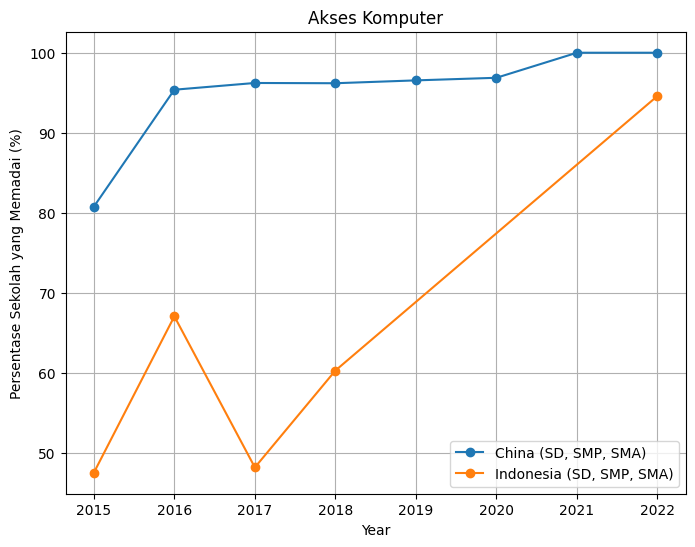

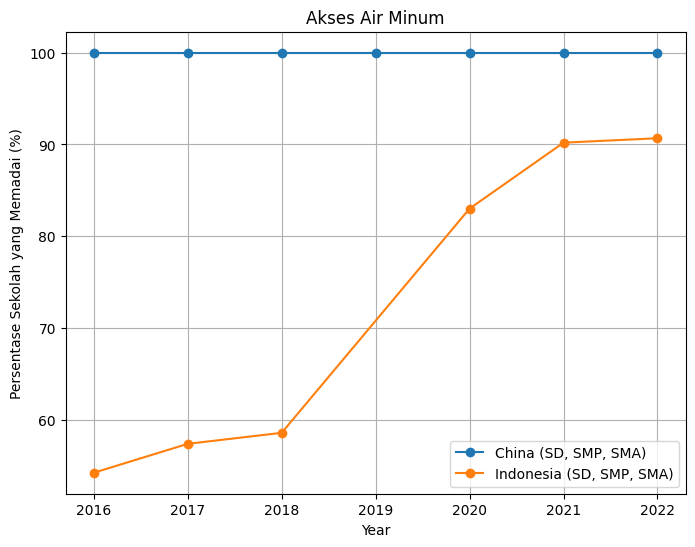

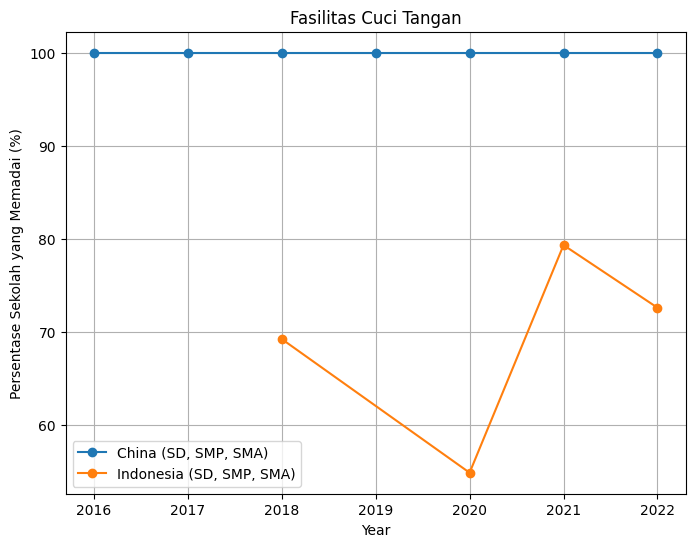

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
china_df = pd.read_csv('4.a_china.csv')
indonesia_df = pd.read_csv('4.a_indonesia.csv')

# Group data by 'SeriesDescription' for China and Indonesia
china_grouped = china_df.groupby(['SeriesDescription', 'TimePeriod']).mean(numeric_only=True).reset_index()
indonesia_grouped = indonesia_df.groupby(['SeriesDescription', 'TimePeriod']).mean(numeric_only=True).reset_index()

# Find common series descriptions in both datasets
common_series_descriptions = list(set(china_df['SeriesDescription']).intersection(set(indonesia_df['SeriesDescription'])))

# Custom titles mapping
titles = {
    'Proportion of schools with basic handwashing facilities, by education level (%)': 'Fasilitas Cuci Tangan',
    'Proportion of schools with access to\xa0computers for pedagogical purposes, by education level (%)': 'Akses Komputer',
    'Proportion of schools with access to\xa0electricity, by education level (%)': 'Akses Listrik',
    'Proportion of schools with access to basic drinking water, by education level (%)': 'Akses Air Minum',
    'Proportion of schools with access to the internet for pedagogical purposes, by education level (%)': 'Akses Internet',
    'Proportion of schools with access to single-sex basic sanitation, by education level (%)': 'Fasilitas Sanitasi'
}

# Plot line charts for each common series description
for series in common_series_descriptions:
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Get the data for the current series description
    china_data = china_grouped[china_grouped['SeriesDescription'] == series]
    indonesia_data = indonesia_grouped[indonesia_grouped['SeriesDescription'] == series]
    
    # Plot line charts for the current series description
    if not china_data.empty:
        plt.plot(china_data['TimePeriod'], china_data['Value'], label='China (SD, SMP, SMA)', marker='o')
    
    if not indonesia_data.empty:
        plt.plot(indonesia_data['TimePeriod'], indonesia_data['Value'], label='Indonesia (SD, SMP, SMA)', marker='o')
    
    # Set titles and labels
    title = titles.get(series, series)  # Use the custom title if available, otherwise use the series name
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Persentase Sekolah yang Memadai (%)')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()
